### Data Analysis Interview Challenge

Ken Wallace <br>
Springboard Career Track section 21.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
from pandas.io.json import json_normalize

from IPython.core.display import HTML

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['figure.figsize'] = 16, 8

In [2]:
print(plt.rcParams.get('figure.figsize'))

[16.0, 8.0]


#### Part 1 - Exploratory Data Analysis

In [3]:
# load data
data = json.load(open('logins.json'))
data

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [4]:
# create data frame from dictionary
logins = pd.DataFrame.from_dict(data, orient='columns')
logins.dtypes

login_time    object
dtype: object

In [5]:
# convert object to datetime format
logins['login_time'] = pd.to_datetime(logins['login_time'], format = '%Y-%m-%d %H:%M:%S')
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [6]:
logins.set_index('login_time', inplace=True)

In [7]:
logins['count'] = 1

In [8]:
grp = logins.resample('15T').sum()

In [9]:
grp

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,NaN
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


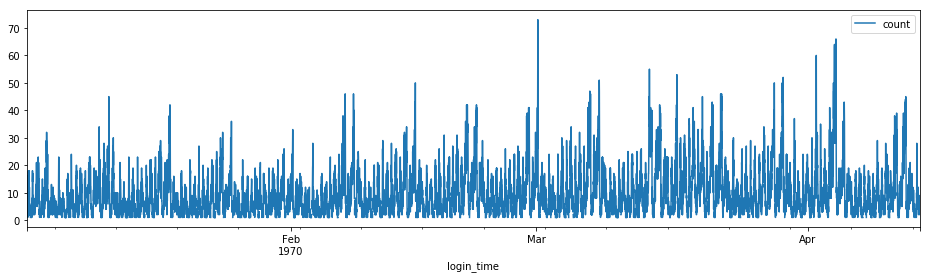

In [10]:
grp.plot(grp.index, 'count', figsize=(16,4))

The above plot shows a repeating pattern, where demand has weekly peaks corresponding to weekend days. With further analysis it would be interesting to see if the tallest spikes correspond to holidays or even weekend holidays.

In [11]:
# perform some feature engineering to add weekday name
grp['weekday_name'] = grp.index.weekday_name
grp

,count,weekday_name
login_time,,
1970-01-01 20:00:00,2.0,Thursday
1970-01-01 20:15:00,6.0,Thursday
1970-01-01 20:30:00,9.0,Thursday
1970-01-01 20:45:00,7.0,Thursday
1970-01-01 21:00:00,1.0,Thursday
1970-01-01 21:15:00,4.0,Thursday
1970-01-01 21:30:00,NaN,Thursday
1970-01-01 21:45:00,4.0,Thursday
1970-01-01 22:00:00,9.0,Thursday


In [12]:
grp.groupby('weekday_name')['count'].sum().sort_values()

weekday_name
Monday        8823.0
Tuesday       9268.0
Wednesday    10339.0
Thursday     11960.0
Friday       15208.0
Sunday       18167.0
Saturday     19377.0
Name: count, dtype: float64

In [13]:
# perform some feature engineering to add day of week and hour
grp['dayofweek'] = grp.index.dayofweek
grp['hour'] = grp.index.hour
grp

,count,weekday_name,dayofweek,hour
login_time,,,,
1970-01-01 20:00:00,2.0,Thursday,3,20
1970-01-01 20:15:00,6.0,Thursday,3,20
1970-01-01 20:30:00,9.0,Thursday,3,20
1970-01-01 20:45:00,7.0,Thursday,3,20
1970-01-01 21:00:00,1.0,Thursday,3,21
1970-01-01 21:15:00,4.0,Thursday,3,21
1970-01-01 21:30:00,NaN,Thursday,3,21
1970-01-01 21:45:00,4.0,Thursday,3,21
1970-01-01 22:00:00,9.0,Thursday,3,22


In [14]:
# categorizes days of the week as weekday (= yes) or weekend (= no)
grp['weekday']=np.where(grp.dayofweek<4, 'yes','no')
grp

,count,weekday_name,dayofweek,hour,weekday
login_time,,,,,
1970-01-01 20:00:00,2.0,Thursday,3,20,yes
1970-01-01 20:15:00,6.0,Thursday,3,20,yes
1970-01-01 20:30:00,9.0,Thursday,3,20,yes
1970-01-01 20:45:00,7.0,Thursday,3,20,yes
1970-01-01 21:00:00,1.0,Thursday,3,21,yes
1970-01-01 21:15:00,4.0,Thursday,3,21,yes
1970-01-01 21:30:00,NaN,Thursday,3,21,yes
1970-01-01 21:45:00,4.0,Thursday,3,21,yes
1970-01-01 22:00:00,9.0,Thursday,3,22,yes


In [15]:
avg_per_hour = grp.groupby('hour').agg({'count':'mean'})
weekday_by_hour = grp.loc[grp.weekday == 'yes'].groupby('hour').agg({'count':'mean'})
weekend_by_hour = grp.loc[grp.weekday == 'no'].groupby('hour').agg({'count':'mean'})

([<matplotlib.axis.XTick at 0x2aeea58ff98>,
 <a list of 24 Text xticklabel objects>)

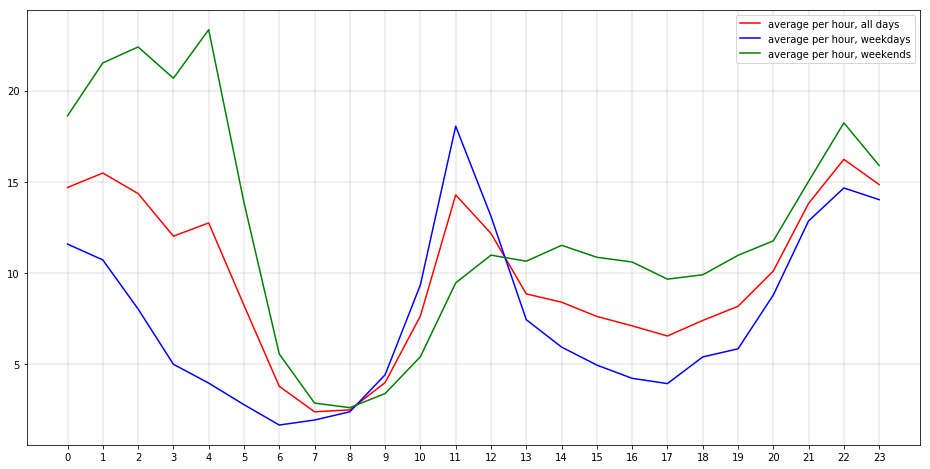

In [16]:
plt.plot(avg_per_hour.index, avg_per_hour['count'], color='red')
plt.plot(weekday_by_hour.index, weekday_by_hour['count'], color='blue')
plt.plot(weekend_by_hour.index, weekend_by_hour['count'], color='green')
plt.legend(['average per hour, all days','average per hour, weekdays','average per hour, weekends'])
plt.xticks(np.arange(0, 24, 1.0));
plt.grid(color='grey', linestyle='-', linewidth=.25)

Based on the average logins per hour, with the red line equal to the average for any given day, blue for weekdays, and green for weekends. It becomes clear that peak demand is weekend evenings, weekday lunch hour, and weekend afternoons, based on the highest lines in any given hour of the day.

#### Part 2 - Experiment and metrics design

<i> The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. </i>

<b> 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? </b>

The key measure of success would be an increase in driver pickups in their away city by some percentage (25-50%?). This would provide an indication of whether drivers are disinclined to pick up in their neighboring city because of the bridge toll or because of the distance, assuming distance is a corrolary to the amount of time a customer must wait to be picked up relative to the availability of all drivers at time of request. 

<b> 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: </b>

<b> a. how you will implement the experiment </b>

I would set up an experiment where half the drivers from each city are to be reimbursed for their tolls and the other half are not. This by itself would indicate if reimbursement is the issue. This test may need to be limited to weekdays, where there is a measurable difference between activity level in each city based on time of day. 

A second phase of the experiment might be to penalize drivers who are: available at the time a customer requests a ride; based in the neighboring city; and who do not accept that pickup request.

In either of these cases, the test group may be limited in order to minimize any negative impact to Ultimate's short term revenue stream, provided enough data can be collected in a reasonable period of time.

<b> b. what statistical test(s) you will conduct to verify the significance of the observation </b>

I will conduct a hypothesis test where the null hypothesis is that reimbursing tolls will have no impact to number of riders collected in the driver's neighboring city and the alternate hypothesis is that by the company paying the tolls the number of riders collected in the driver's neighboring city is increased. Upon completion of the experiment, the amount revenue is increased (if any) should be compared against the cost of tolls reimbursed and the number of referrals to new drivers and passengers.

<b> c. how you would interpret the results and provide recommendations to the city operations team along with any caveats. </b>

Depending on whether or not the null hypothesis is rejected, the recommendation could be to continue or cease reimbursement of bridge tolls for all drivers. In particular, if increased ridership occurs, rider wait times are reduced, or if new drivers are referred to Ultimate, these would be valuable indicators of how to proceed. 

#### Part 3 - Predictive modeling

In [51]:
data = json.load(open('ultimate_data_challenge.json'))
data

[{'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'city': "King's Landing",
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'signup_date': '2014-01-25',
  'surge_pct': 15.4,
  'trips_in_first_30_days': 4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2},
 {'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'city': 'Astapor',
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'signup_date': '2014-01-29',
  'surge_pct': 0.0,
  'trips_in_first_30_days': 0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0},
 {'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0,
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'city': 'Astapor',
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'signup_date': '2014-01-06',
  'surge_pct': 0.0,
  'trips_in_first_30_days': 3,
  'ultimate_black_user': False,
  'weekday_pct': 100.0},
 {'avg_dist': 2.36,
  'avg_rating_by_driver

In [52]:
# load as Pandas dataframe
ultimate = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [53]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [54]:
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'])
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'])
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [55]:
ultimate = pd.concat([ultimate.drop('city', axis=1), pd.get_dummies(ultimate['city'])], axis=1)
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell
0,3.67,5.0,4.7,1.10,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,0,1,0
1,8.26,5.0,5.0,1.00,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,0,1,0
4,3.13,4.9,4.4,1.19,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0,0,1


In [56]:
ultimate['ultimate_black_user'] = ultimate['ultimate_black_user'] * 1
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell
0,3.67,5.0,4.7,1.10,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,0,1,0
1,8.26,5.0,5.0,1.00,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,1,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,0,1,0
4,3.13,4.9,4.4,1.19,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0,0,1


In [57]:
ultimate.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,0.37708,60.926084,0.330680,0.202600,0.466720
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,0.48466,37.081503,0.470463,0.401941,0.498896
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,0.000000,0.000000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,1.000000


In [58]:
ultimate.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
Astapor                      0
King's Landing               0
Winterfell                   0
dtype: int64

There are 0.4% missing values in the avg_rating_by_driver column, 16.2% missing values in the avg_rating_of_driver column, and 0.79% missing values in the phone column. 

There is no way to impute phone number, and it's possible that it should be "other" rather than "NaN", but as this won't likely be used in any predictions, it will be left as is. 

As for average ratings of and by drivers, we could impute to the mean or median (or use a tool like MICE) based on passengers in the same city with a similar (+/- 20%) number of rides and whether they are a Black user or not.

(array([  1.81000000e+02,   0.00000000e+00,   0.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.26000000e+02,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   3.10000000e+01,
          2.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          6.02000000e+02,   2.00000000e+00,   4.70000000e+01,
          2.04000000e+02,   1.90000000e+01,   1.95000000e+02,
          1.52000000e+02,   1.91400000e+03,   1.25000000e+02,
          1.36000000e+03,   8.60000000e+02,   2.42400000e+03,
          5.40800000e+03,   4.53700000e+03,   3.16020000e+04]),
 array([ 1.        ,  1.13333333,  1.26666667,  1.4       ,  1.53333333,
         1.66666667,  1.8       ,  1.93333333,  2.06666667,  2.2       ,
         2.33333333,  2.46666667,  2.6       ,  2.73333333,  2.86666667,
         3.        ,  3.13333333,  3.26666667,  3.4       ,  3.53333333,
         3.66666667,  3.8       ,  3.93333333,  4.06666667,  4.2       ,
         4.33

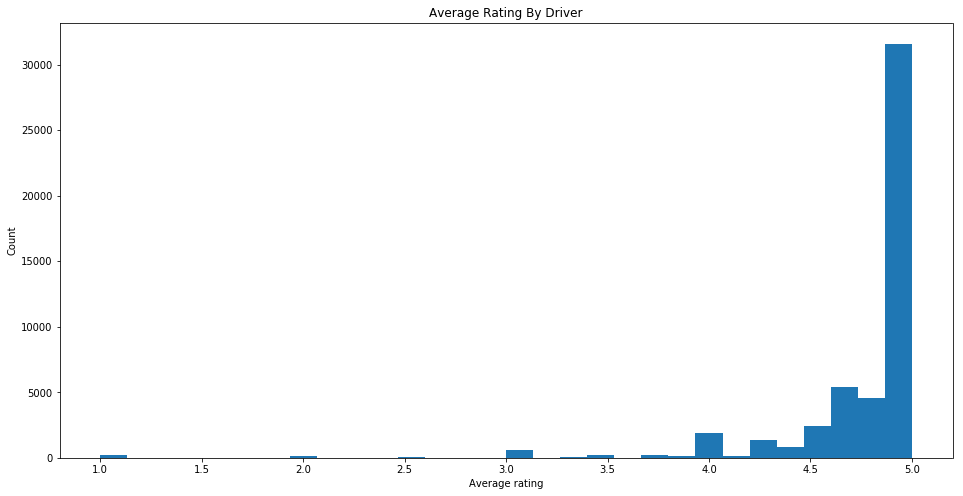

In [59]:
plt.hist(ultimate.avg_rating_by_driver.dropna(), bins=30)
plt.xlabel('Average rating')
plt.ylabel('Count')
plt.title('Average Rating By Driver')

(array([  2.56000000e+02,   0.00000000e+00,   0.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   2.09000000e+02,   6.00000000e+00,
          2.30000000e+01,   3.00000000e+00,   9.40000000e+01,
          5.90000000e+01,   2.80000000e+01,   1.30000000e+01,
          1.04200000e+03,   5.30000000e+01,   2.01000000e+02,
          5.96000000e+02,   1.72000000e+02,   3.64000000e+02,
          6.83000000e+02,   4.19300000e+03,   3.98000000e+02,
          2.08800000e+03,   8.29000000e+02,   2.49800000e+03,
          3.08800000e+03,   2.43000000e+03,   2.25420000e+04]),
 array([ 1.        ,  1.13333333,  1.26666667,  1.4       ,  1.53333333,
         1.66666667,  1.8       ,  1.93333333,  2.06666667,  2.2       ,
         2.33333333,  2.46666667,  2.6       ,  2.73333333,  2.86666667,
         3.        ,  3.13333333,  3.26666667,  3.4       ,  3.53333333,
         3.66666667,  3.8       ,  3.93333333,  4.06666667,  4.2       ,
         4.33

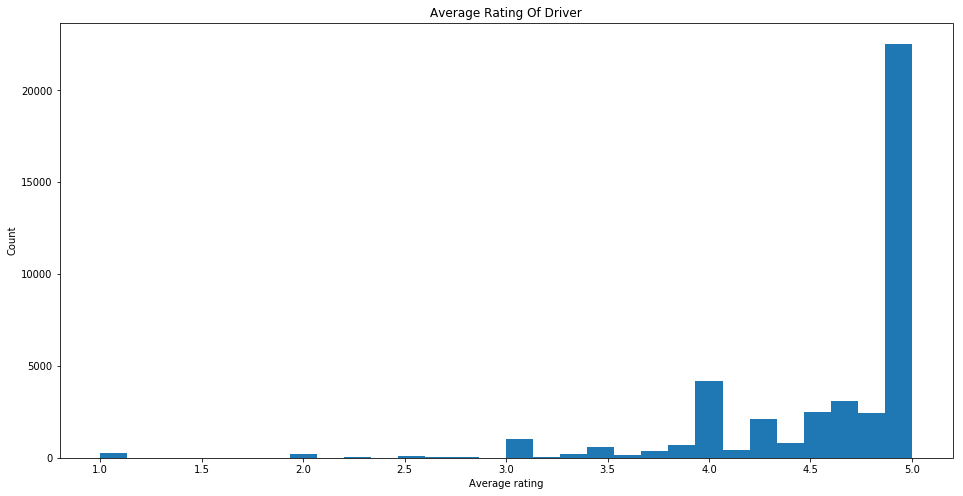

In [60]:
plt.hist(ultimate.avg_rating_of_driver.dropna(), bins=30)
plt.xlabel('Average rating')
plt.ylabel('Count')
plt.title('Average Rating Of Driver')

In [61]:
print("Percentage of ratings by driver above 4.0 = %f" % 
      ((ultimate.avg_rating_by_driver[ultimate.avg_rating_by_driver>=4.0].count()*100.0)/ultimate.avg_rating_by_driver.count()))

print("Percentage of ratings of driver above 4.0 = %f" % 
      ((ultimate.avg_rating_of_driver[ultimate.avg_rating_of_driver>=4.0].count()*100.0)/ultimate.avg_rating_of_driver.count()))

Percentage of ratings by driver above 4.0 = 96.849334
Percentage of ratings of driver above 4.0 = 90.897369


As seen in the plots and calculations above, a large percentage of ratings, of both drivers and by drivers, are 4.0 or above. 

Options for imputing the missing ratings values include mean and median, which would probably be fine considering how at least 90% of all knows reviews is 4.0 or above. But another option is to use MICE (Multiple Imputation by Chained Equations), which regresses them against the other variables in the data to come up with a more likely imputed value. Unable to install fancyimpute library, I will impute values to the mean values for those columns.

In [62]:
ultimate.avg_rating_by_driver.fillna(ultimate.avg_rating_by_driver.mean(), inplace=True)
ultimate.avg_rating_of_driver.fillna(ultimate.avg_rating_of_driver.mean(), inplace=True)

In [63]:
ultimate.isnull().sum()

avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
Astapor                     0
King's Landing              0
Winterfell                  0
dtype: int64

In [64]:
ultimate.phone[ultimate.phone.isnull()] = "Other"

C:\Users\conee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
ultimate['phone'] = ultimate.phone.astype('category')
ultimate['phone_cat'] = ultimate['phone'].cat.codes

In [66]:
ultimate.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
Astapor                   0
King's Landing            0
Winterfell                0
phone_cat                 0
dtype: int64

In [67]:
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell,phone_cat
0,3.67,5.0,4.7,1.10,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,0,1,0,2
1,8.26,5.0,5.0,1.00,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,1,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,1,0,0,2
3,2.36,4.9,4.6,1.14,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,0,1,0,2
4,3.13,4.9,4.4,1.19,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0,0,1,0


Now the dataset is clean.

(array([ 15022.,      0.,      0.,      0.,      0.,    396.,      0.,
             0.,      0.,  34582.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

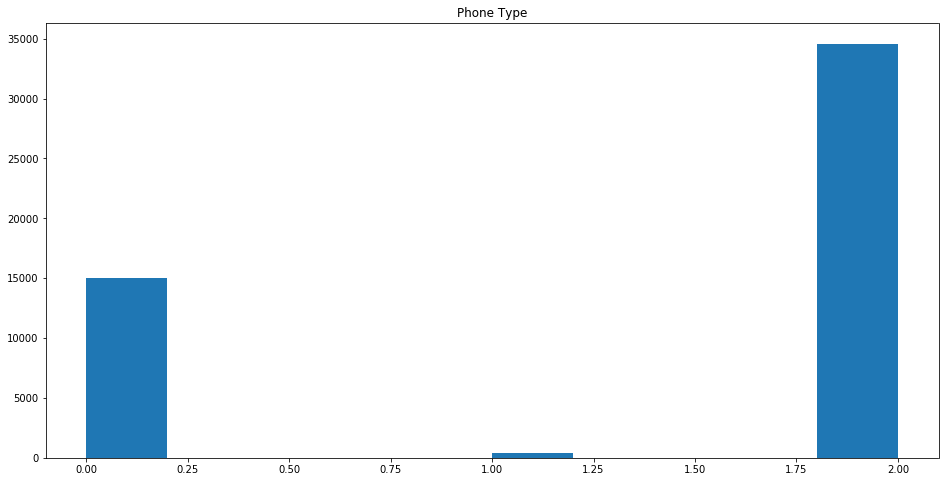

In [68]:
plt.hist(ultimate['phone_cat'])
plt.title('Phone Type')

In [69]:
ultimate.groupby(['phone'])['ultimate_black_user'].sum()

phone
Android     4822
Other        242
iPhone     13790
Name: ultimate_black_user, dtype: int32

It appears that iPhone users are nearly 3x more likely to become Ultimate Black users

(array([  4.32500000e+04,   4.15800000e+03,   1.34200000e+03,
          5.78000000e+02,   3.13000000e+02,   1.52000000e+02,
          9.70000000e+01,   3.80000000e+01,   2.50000000e+01,
          1.30000000e+01,   1.20000000e+01,   7.00000000e+00,
          6.00000000e+00,   5.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([   0.        ,    4.16666667,    8.33333333,   12.5       ,
          16.66666667,   20.83333333,   25.        ,   29.16666667,
          33.33333333,   37.5       ,   41.66666667,   45.83333333,
          50.        ,   54.16666667,   58.33333333,   62.5       ,
          66.66666667,   70.83333333,   75.        ,   79.16666667,
          83.33333333,   87.5       , 

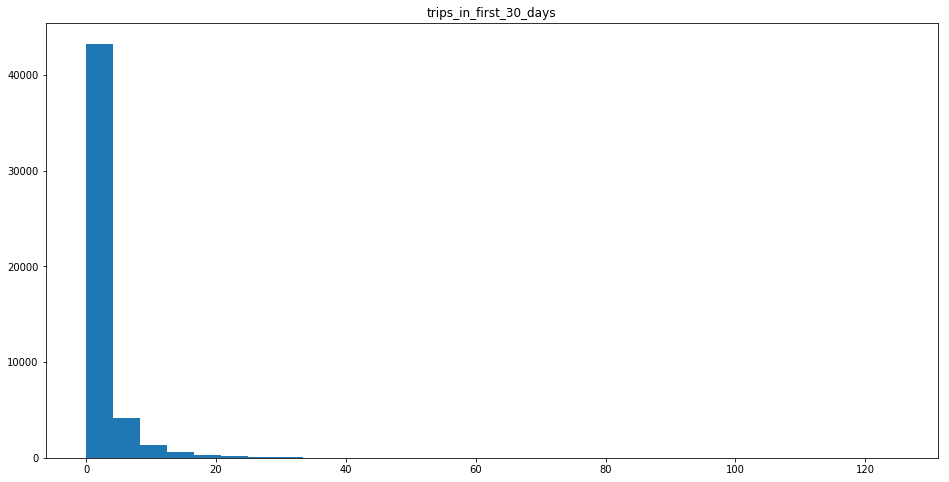

In [70]:
plt.hist(ultimate['trips_in_first_30_days'], bins=30)
plt.title('trips_in_first_30_days')

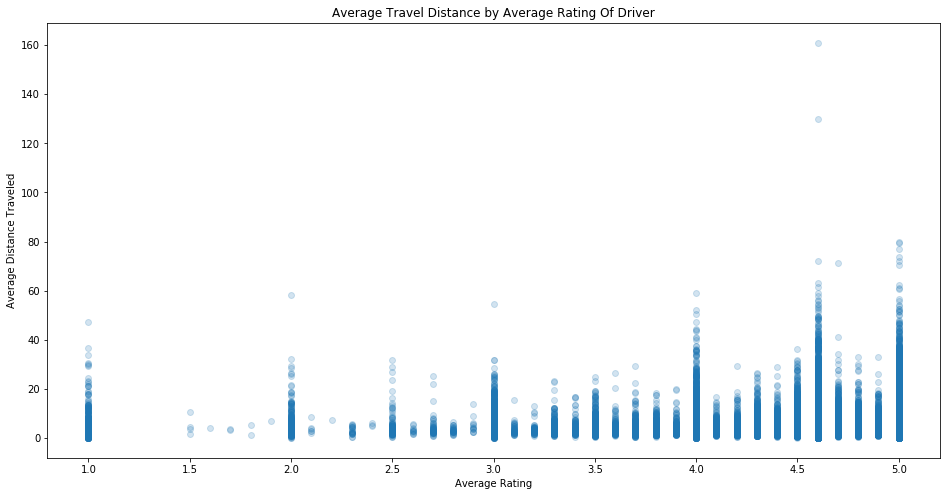

In [71]:
plt.scatter(ultimate.avg_rating_of_driver, ultimate.avg_dist, alpha=.2)
plt.xlabel('Average Rating')
plt.ylabel('Average Distance Traveled')
plt.title('Average Travel Distance by Average Rating Of Driver')

There appears to be a slight trend of drivers getting higher ratings when their users take them longer distances. 

To determine if a user has been retained, we want to look at whether they have taken a trip in the previous 30 days. First is to find the latest date in the dataset, then compare each user's last trip date and see if it has been more than 30 days from when this data was reviewed. A column will be added to the dataframe with a 1 if retained and a 0 if not.

In [72]:
latest_date = max(ultimate.last_trip_date); latest_date

Timestamp('2014-07-01 00:00:00')

In [73]:
import datetime

latest = max(ultimate['last_trip_date'])
days = [latest - datetime.timedelta(days=x) for x in range(0, 30)]
ultimate['retained'] = ultimate['last_trip_date'].map(lambda x: int(x in days))
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell,phone_cat,retained
0,3.67,5.0,4.7,1.10,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,0,1,0,2,1
1,8.26,5.0,5.0,1.00,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,1,0,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,1,0,0,2,0
3,2.36,4.9,4.6,1.14,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,0,1,0,2,1
4,3.13,4.9,4.4,1.19,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0,0,1,0,0


Percentage of users retained

In [83]:
print("Percentage of users retained = %f" % (len(ultimate.retained[ultimate['retained']==1])*100/(len(ultimate.retained))))

Percentage of users retained = 36.620000


Retained users phone types

In [100]:
ret_phone = ultimate.phone_cat[ultimate.retained==1].value_counts(); ret_phone

2    15238
0     2942
1      130
Name: phone_cat, dtype: int64

<Container object of 3 artists>

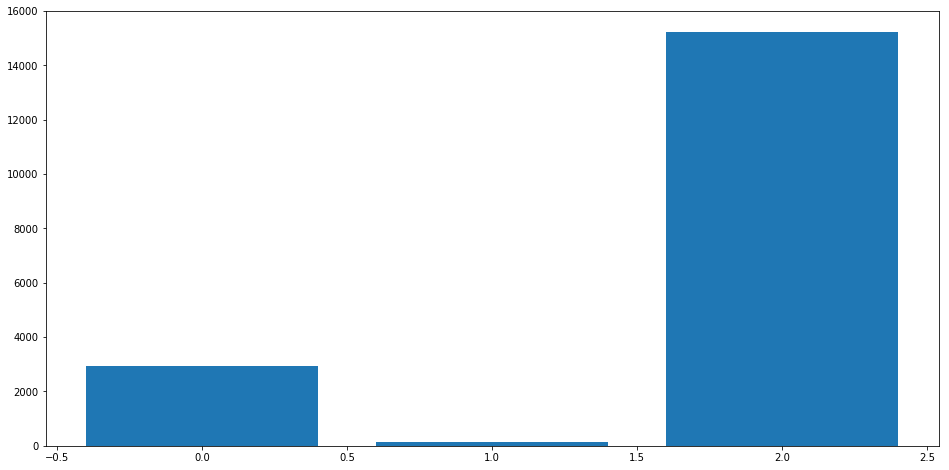

In [101]:
plt.bar(ret_phone.index, ret_phone.values)

iPhone users are much more likely to be retained

In [102]:
ultimate['active'] = ((ultimate['last_trip_date'] - ultimate['signup_date']) / np.timedelta64(1, 'M')).map(lambda x: 1 if x > 5 else 0)

In [103]:
ultimate.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell,phone_cat,retained,active
0,3.67,5.0,4.7,1.10,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,0,1,0,2,1,0
1,8.26,5.0,5.0,1.00,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,1,0,0,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,1,0,0,2,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,0,1,0,2,1,1
4,3.13,4.9,4.4,1.19,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0,0,1,0,0,0


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.formula.api as sm

In [146]:
ult_clean = ultimate.drop(['last_trip_date','signup_date','phone'], axis=1)
ult_clean.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Astapor,King's Landing,Winterfell,phone_cat,retained,active
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0,1,0,2,1,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,1,0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,1,0,0,2,0,0
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,0,1,0,2,1,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,0,1,0,0,0


In [169]:
ult_clean.rename(columns={"King's Landing": 'Kings_Landing'}, inplace=True)

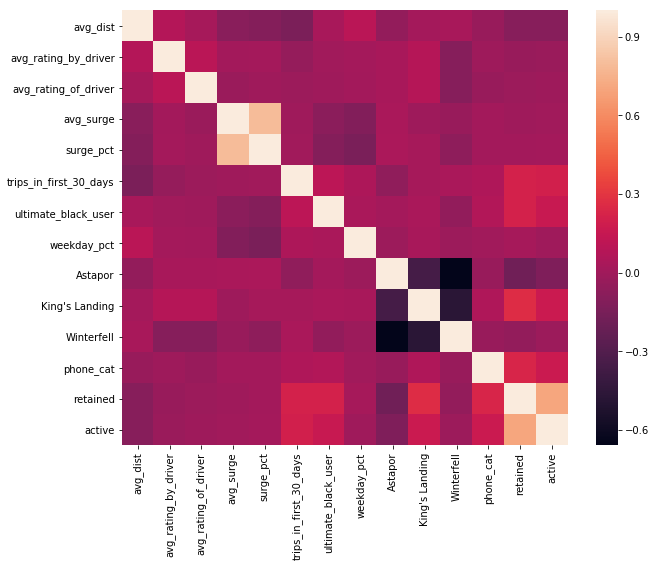

In [122]:
import seaborn as sns
corr = ultimate.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [154]:
x = ult_clean.drop('active', axis=1)
y = ult_clean.active

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [156]:
lm = LinearRegression()

In [157]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [158]:
y_pred = lm.predict(x_test)

In [159]:
x = np.append(arr = np.ones((50000,1)).astype(int), values = x, axis=1)

In [160]:
x

array([[ 1.  ,  3.67,  5.  , ...,  0.  ,  2.  ,  1.  ],
       [ 1.  ,  8.26,  5.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.77,  5.  , ...,  0.  ,  2.  ,  0.  ],
       ..., 
       [ 1.  ,  3.86,  5.  , ...,  1.  ,  0.  ,  0.  ],
       [ 1.  ,  4.58,  3.5 , ...,  0.  ,  2.  ,  0.  ],
       [ 1.  ,  3.49,  5.  , ...,  0.  ,  0.  ,  0.  ]])

In [161]:
ult_clean.shape

(50000, 14)

In [170]:
ult_clean.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct', 'Astapor', 'Kings_Landing', 'Winterfell', 'phone_cat',
       'retained', 'active'],
      dtype='object')

In [177]:
x_opt = x[:, [1,5,6,8,10,11,12,13]]
OLS = sm.OLS(endog = y, exog = x_opt).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 active   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     9952.
Date:                Fri, 26 Jan 2018   Prob (F-statistic):               0.00
Time:                        16:24:36   Log-Likelihood:                -9714.1
No. Observations:               50000   AIC:                         1.944e+04
Df Residuals:                   49992   BIC:                         1.951e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0012      0.000     -5.251      0.000      -0.002      -0.001
x2             0.0002   6.46e-05      2.692      0.007    4.73e-05       0.000
x3             0.0054      0.000     15.249      0.000       0.005       0.006
x4            -0.0002   3.09e-05     -5.127      0.000      -0.000   -9.78e-05
x5            -0.0182      0.004     -4.888      0.000      -0.026      -0.011
x6             0.0080      0.003      2.919      0.004       0.003       0.013
x7             0.0031      0.001      2.376      0.018       0.001       0.006
x8             0.6051      0.003    202.562      0.000       0.599       0.611
==============================================================================
Omnibus:                     3917.916   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4896.486
Skew:                          -0.750   Prob(JB):                         0.00
Kurtosis:                       3.320   Cond. No.                         229.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the above Multiple Linear Regression (MLR), the variables that would, in combination, predict the active users are:
* 'avg_dist'
* 'surge_pct'
* 'trips_in_first_30_days'
* 'weekday_pct'
* 'Kings_Landing'
* 'Winterfell'
* 'phone_cat'
* 'retained'

This indicates that marketing could be geared toward those users from King's Landing (Winterfell has a negative coefficient, meaning that has a negative impact on whether they remain active), and also those who use iPhones, and those who have taken trips in the past 30 days. I'd also look at the Ultimate Black users, because there was a moderate correlation between active users and Black users per the correlation matrix, even if this didn't show as statistically significant in the MLR.